# **Gerekli kütüphaneleri import ediyoruz.**
Ardından train.csv dosyamızı okuyup Data Frame'e atıyoruz.




In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')


In [19]:
#Öncelikle veri setimizde eksik değer var mı kontrol ediyoruz
df.isnull().sum()


index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
Sipariş Dönüşüm Oranı (%)                     0
Satın Alma Gücü                               0
Yıllık Gelirin Satın Alma Miktarına Oranı     0
dtype: int64

In [20]:
# Sayısal kolonlar için aykırı değer kontrolü yapıyorum.
df.describe()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Sipariş Dönüşüm Oranı (%),Satın Alma Gücü,Yıllık Gelirin Satın Alma Miktarına Oranı
count,5460.000000,5.460000e+03,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,2729.500000,3.635711e+05,16616.612217,24.040884,73.445693,32283.048652,0.041832,0.041832
std,1576.310566,2.197144e+05,14099.171704,14.945655,47.214184,26512.858719,0.024536,0.024536
min,0.000000,4.392299e+04,2859.254000,0.000000,3.977559,2551.653540,0.010590,0.010590
25%,1364.750000,2.156934e+05,4931.859057,11.550502,25.009168,7007.258405,0.022040,0.022040
50%,2729.500000,2.869254e+05,8426.818967,20.095924,82.485579,29462.603969,0.033250,0.033250
75%,4094.250000,4.681882e+05,30579.244695,35.918161,104.473291,43831.486293,0.064344,0.064344
max,5459.000000,1.192437e+06,48605.594415,64.616196,242.308441,137046.895513,0.147513,0.147513


## **Veri setimiz hakkında genel bir bilgiye sahip olmak ve fikir sahibi olmak için verileri görselleştiriyoruz.**


### **Cinsiyet dağılımı için pasta grafiği**

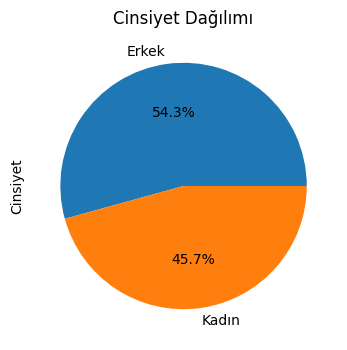

In [21]:
plt.figure(figsize=(7,4))
df['Cinsiyet'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cinsiyet Dağılımı')
plt.show()


###**Medeni Durum için çubuk grafiği**


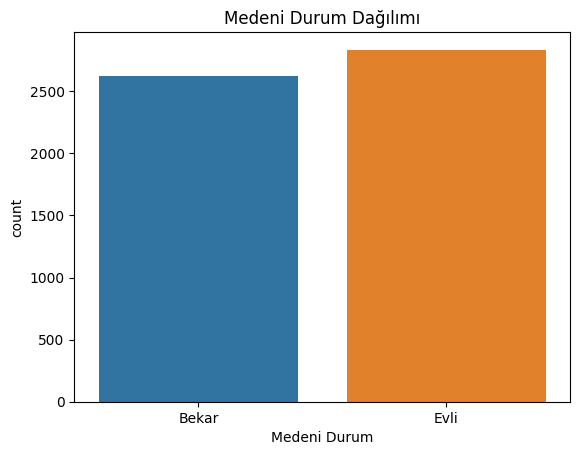

In [22]:
sns.countplot(x='Medeni Durum', data=df)
plt.title('Medeni Durum Dağılımı')
plt.show()

### **Yıllık Ortalama Gelir için histogram**

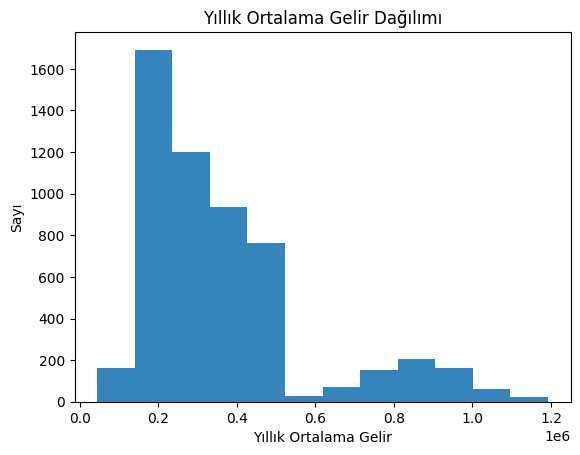

In [23]:
plt.hist(df['Yıllık Ortalama Gelir'], bins=12, alpha=0.9)
plt.title('Yıllık Ortalama Gelir Dağılımı')
plt.xlabel('Yıllık Ortalama Gelir')
plt.ylabel('Sayı')
plt.show()


###**Yıllık Ortalama Satın Alım Miktarı için kutu grafiği**

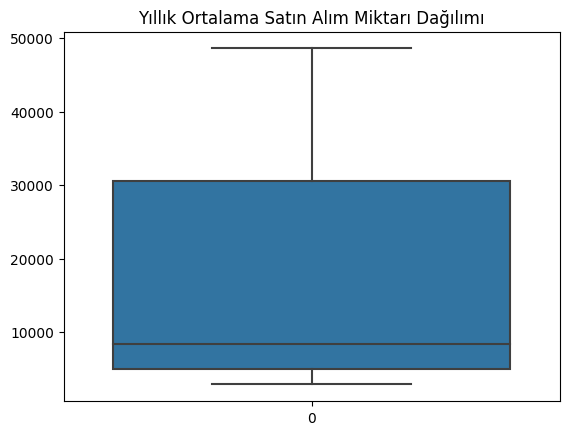

In [24]:
sns.boxplot(df['Yıllık Ortalama Satın Alım Miktarı'])
plt.title('Yıllık Ortalama Satın Alım Miktarı Dağılımı')
plt.show()

## **Genel olarak veri setimizdeki dağılımları inceledik. Şimdi ise Daha ayrıntılı fikir sahibi olmak için özellikler arasındaki ilişkileri inceliyorum.**


### **Sadece sürekli değişkenler arasında korelasyon hesaplama**
Korelasyon, bir değişkenin diğer bir değişkenle ne derecede ilişkili olduğunu gösterir. Değişkenler arasındaki ilişkiyi anlamak için kullanılır.

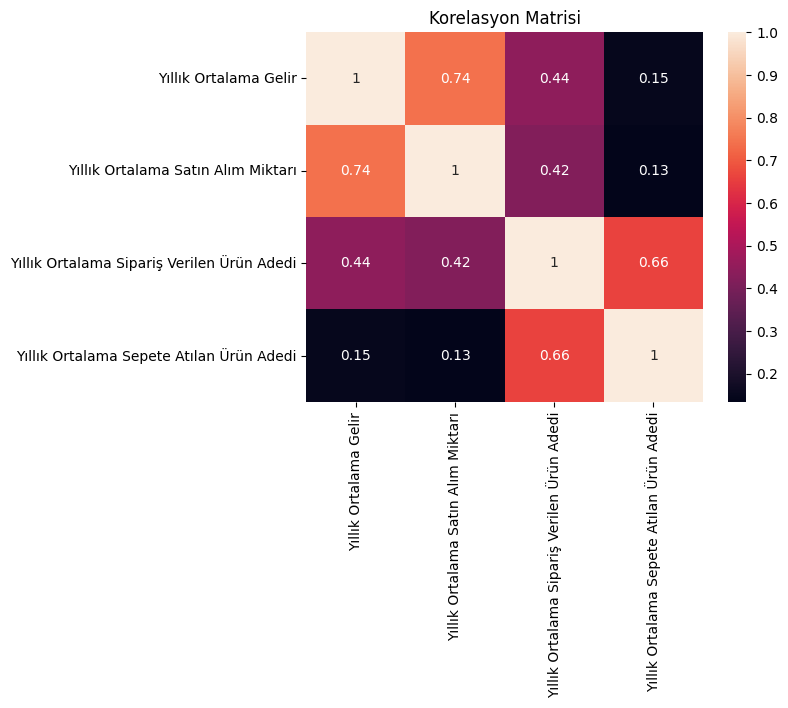

In [25]:
numerical_columns = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Korelasyon Matrisi')
plt.show()


### **Eğitim Düzeyi ile Cinsiyet karşılaştırması**

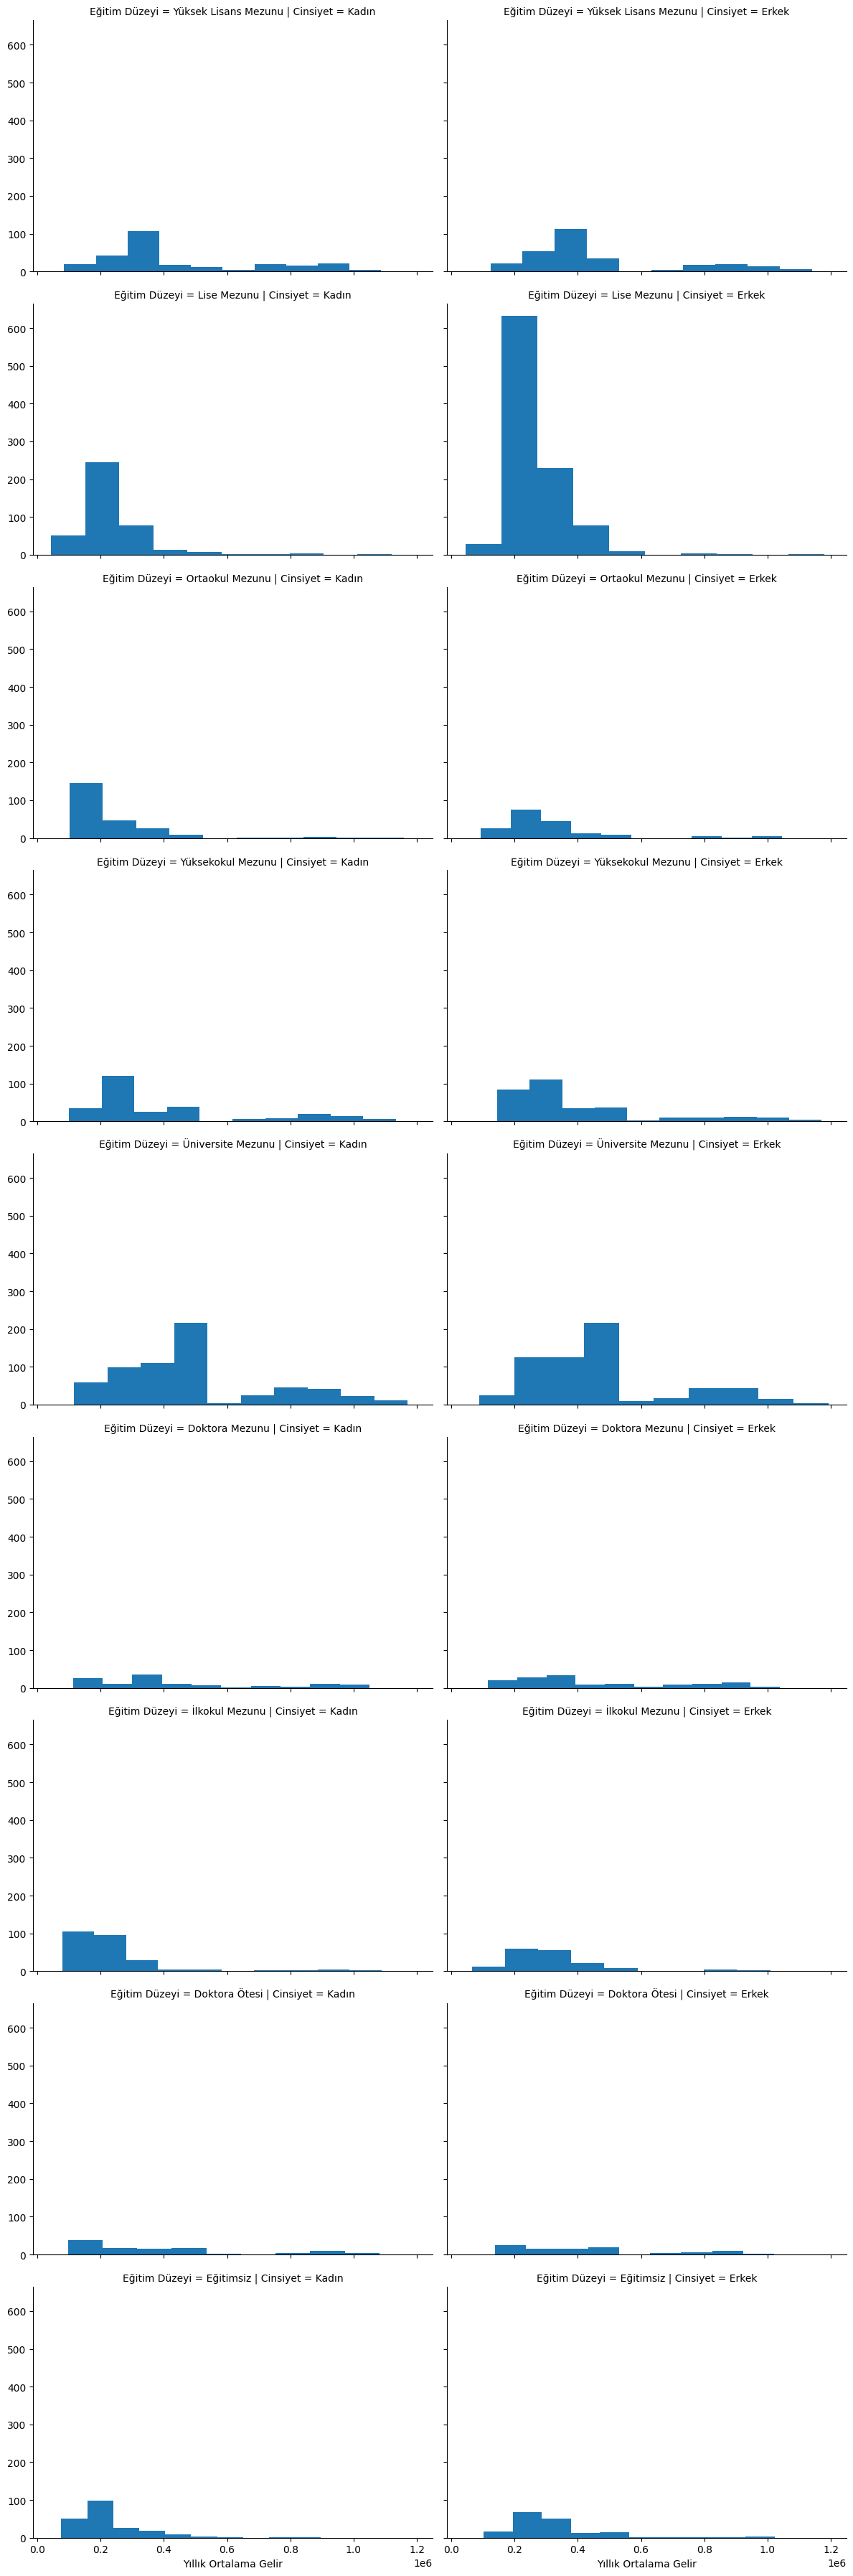

In [26]:
g = sns.FacetGrid(df, col="Cinsiyet", row="Eğitim Düzeyi", height=4, aspect=1.5)
g = g.map(plt.hist, "Yıllık Ortalama Gelir")

### **Cinsiyet ve Yıllık gelirin karşılaştırılması**
Violin Plot,verinin dağılımını hem kutu grafiği hem de yoğunluk grafiği ile gösterir.

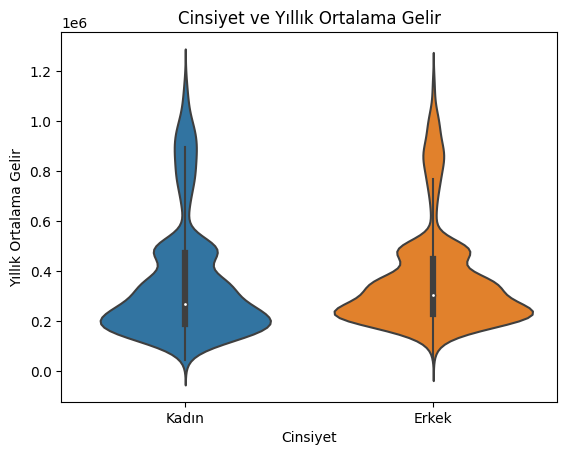

In [27]:
sns.violinplot(x='Cinsiyet', y='Yıllık Ortalama Gelir', data=df)
plt.title('Cinsiyet ve Yıllık Ortalama Gelir')
plt.show()


# **Genel olarak satın alma eğilimlerini incelersek:**
**Yıllık Ortalama Gelir ve Yıllık Ortalama Satın Alım Miktarı (0.74):** Bu iki değişken arasında oldukça yüksek bir pozitif korelasyon var. Bu, yıllık geliri yüksek olan kişilerin genellikle daha fazla satın alma yapma eğiliminde olduğunu gösterir.

**Yıllık Ortalama Gelir ve Yıllık Ortalama Sipariş Verilen Ürün Adedi (0.44):** Korelasyon değeri yüksek değil, ama yine de pozitif. Bu, yıllık geliri daha yüksek olan kişilerin biraz daha fazla sipariş verme eğiliminde olabileceğini gösterir.

**Yıllık Ortalama Gelir ve Yıllık Ortalama Sepete Atılan Ürün Adedi (0.145):** Bu iki değişken arasında oldukça düşük bir korelasyon var. Bu, sepete atılan ürün sayısı ile yıllık gelir arasında güçlü bir ilişki olmadığını gösterir.

**Yıllık Ortalama Sipariş Verilen Ürün Adedi ve Yıllık Ortalama Sepete Atılan Ürün Adedi (0.659):** Bu iki değişken arasında yüksek derecede pozitif bir korelasyon var. Bu, daha fazla ürün siparişi veren kişilerin genellikle sepetlerine de daha fazla ürün eklediğini gösterir.

# **Şu ana kadar veriler hakkında özellikler arası bir bilgi sahibi olduk. Şimdi ise Öbekleri anlamdırmak için öbekler ve değişkenler arasındaki ilişkiye bakacağız.**

## **Öbeklerin Cinsiyete göre dağılımı**

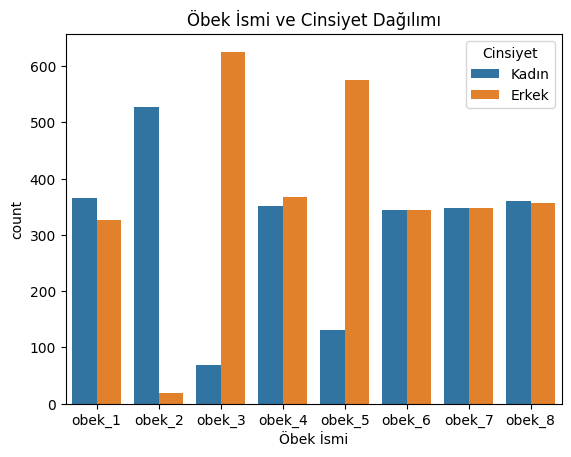

In [28]:
sorted_order = sorted(df['Öbek İsmi'].unique())
sns.countplot(x='Öbek İsmi', hue='Cinsiyet', data=df, order=sorted_order)
plt.title('Öbek İsmi ve Cinsiyet Dağılımı')
plt.show()

## **Öbek İsmi ve Eğitim Düzeyi**

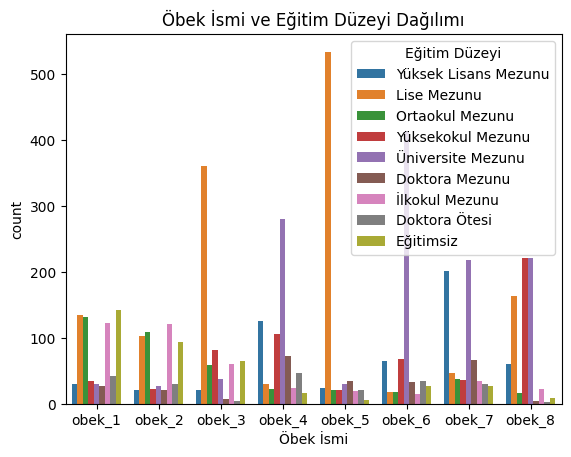

In [29]:
sorted_order = sorted(df['Öbek İsmi'].unique())
sns.countplot(x='Öbek İsmi', hue='Eğitim Düzeyi', data=df,order=sorted_order)
plt.title('Öbek İsmi ve Eğitim Düzeyi Dağılımı')
plt.show()


## **Öbek İsmi ve Yıllık Ortalama Gelir**

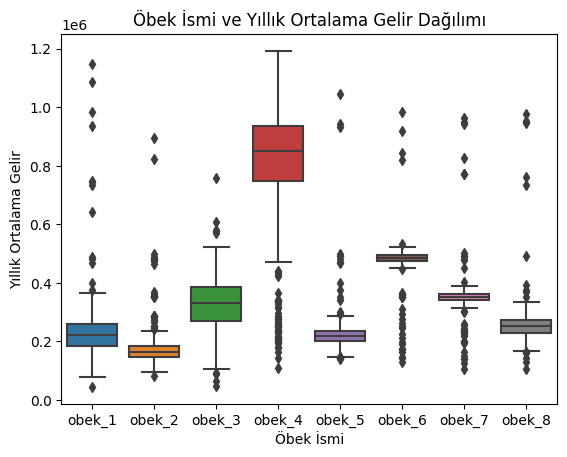

In [30]:
sorted_order = sorted(df['Öbek İsmi'].unique())
sns.boxplot(x='Öbek İsmi', y='Yıllık Ortalama Gelir', data=df,order=sorted_order)
plt.title('Öbek İsmi ve Yıllık Ortalama Gelir Dağılımı')
plt.show()


## **Öbek İsmi ve Yıllık Ortalama Satın Alım Miktarı  **

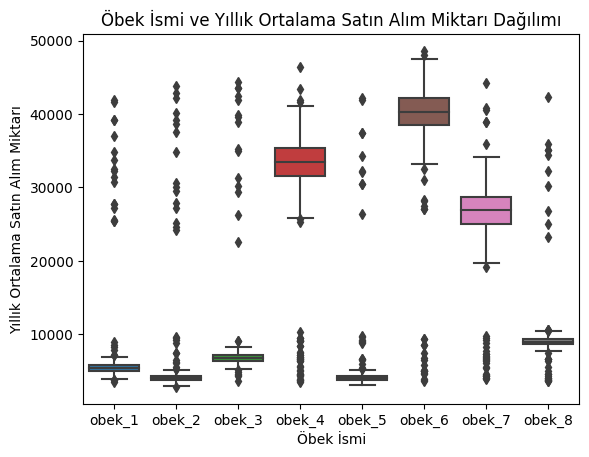

In [31]:
sorted_order = sorted(df['Öbek İsmi'].unique())
sns.boxplot(x='Öbek İsmi', y='Yıllık Ortalama Satın Alım Miktarı', data=df,order=sorted_order)
plt.title('Öbek İsmi ve Yıllık Ortalama Satın Alım Miktarı Dağılımı')
plt.show()


## **Öbek İsmi ve Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı**

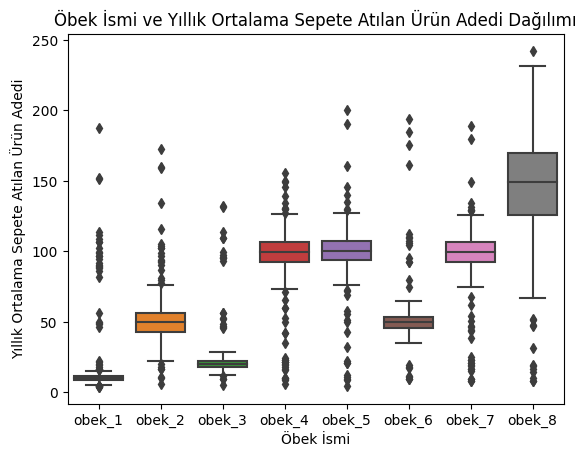

In [32]:
sorted_order = sorted(df['Öbek İsmi'].unique())
sns.boxplot(x='Öbek İsmi', y='Yıllık Ortalama Sepete Atılan Ürün Adedi', data=df,order=sorted_order)
plt.title('Öbek İsmi ve Yıllık Ortalama Sepete Atılan Ürün Adedi Dağılımı')
plt.show()

## **En Çok İlgilendiği Ürün Grubu ve Öbek Dağılımı**

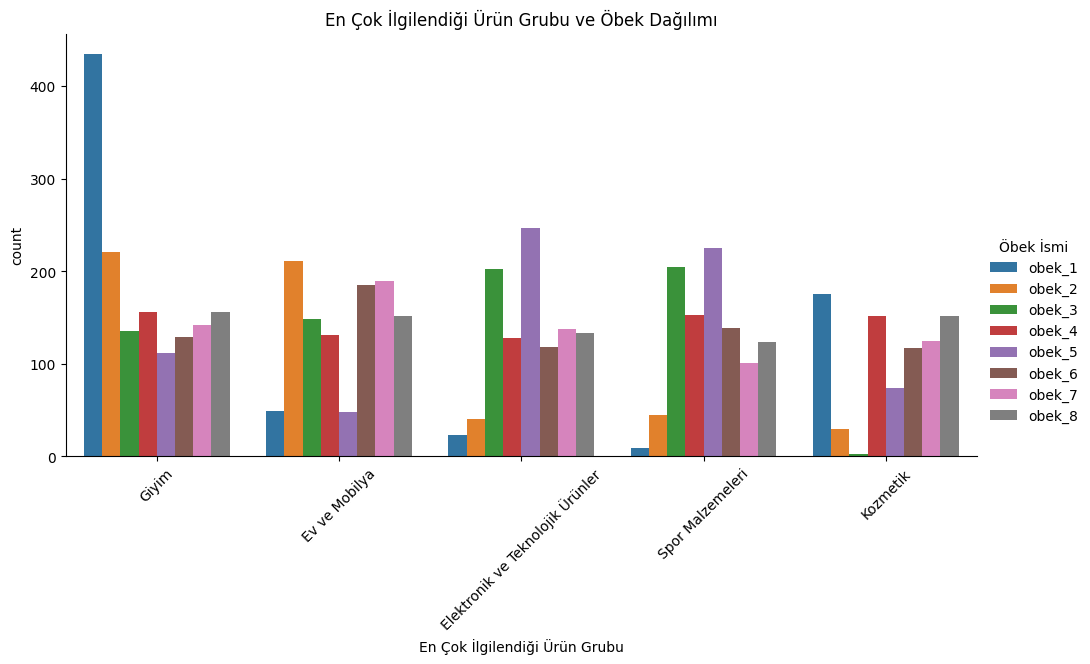

In [33]:
sorted_order = sorted(df['Öbek İsmi'].unique())
sns.catplot(x='En Çok İlgilendiği Ürün Grubu',
            hue='Öbek İsmi',
            kind='count',
            data=df,
            height=5,
            aspect=2,
            order=df['En Çok İlgilendiği Ürün Grubu'].value_counts().index,
            hue_order=sorted_order
           )

plt.title('En Çok İlgilendiği Ürün Grubu ve Öbek Dağılımı')
plt.xticks(rotation=45)
plt.show()


## **Yaş Grubu ve Öbek Dağılımı**

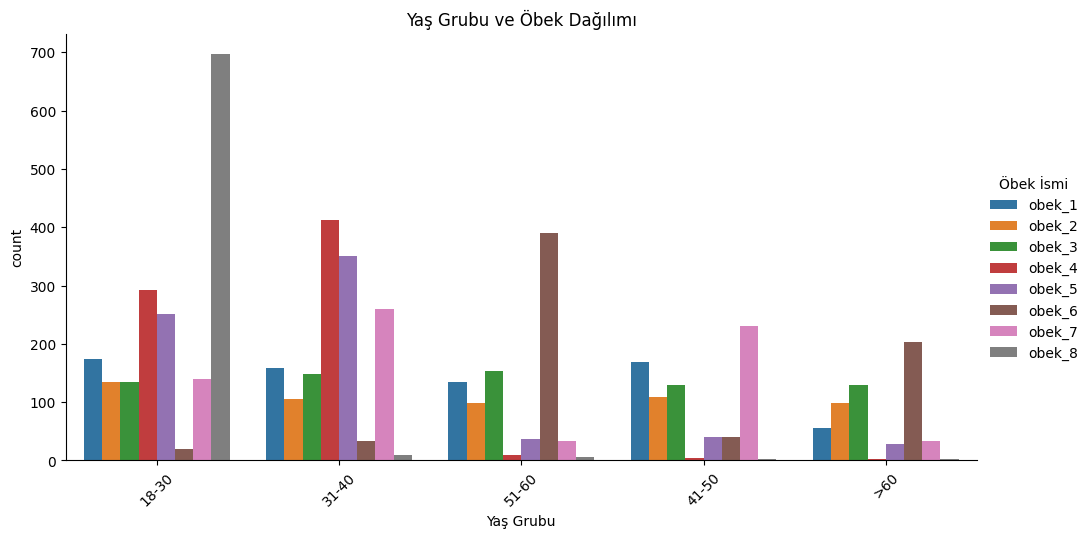

In [34]:
sns.catplot(x='Yaş Grubu',
            hue='Öbek İsmi',
            kind='count',
            data=df,
            height=5,
            aspect=2,
            order=df['Yaş Grubu'].value_counts().index,  # Yaş grubunu popülerliğe göre sıralıyoruz
            hue_order=sorted_order  # Öbekleri sıralıyoruz
           )

plt.title('Yaş Grubu ve Öbek Dağılımı')
plt.xticks(rotation=45)  # x eksenindeki etiketleri döndürelim, daha okunabilir olsunlar diye
plt.show()

# **Öbek 1:**
Bu öbeğin temsil ettiği bireylerin çoğunluğunu lise mezunu ya da daha altı eğitim seviyesinden gelenler oluşturuyor. Düzenli bir işte çalışmayanların ve işsizlerin ağırlıklı olduğu bu kitlede, bazı bireylerin gelir düzeyi istisnai olarak yüksek olabiliyor. Moda ve kozmetiğe olan ilgi dikkat çekerken, alışveriş sıklıkları az ve genellikle uygun fiyatlı ürünleri tercih ediyorlar.

# **Öbek 2:**
Bu grupta kadınların egemenliği göze çarpıyor. Eğitim durumlarına bakıldığında, çoğunlukla lise mezunu ve altı bir eğitim seviyesi görüyoruz. Evli olanların oranı oldukça yüksek. İstihdam durumu incelendiğinde ise işsizlik oranı yüksek. Erkekler bu kategoride azınlıkta.

# **Öbek 3:**
Bu öbeğin baskın özellikleri arasında evlilik ve erkeklik oranı yüksekliği yer alıyor. Eğitim durumları çeşitli olsa da genellikle lise mezunu ve altında bir eğitim seviyesi hakim. Gelirleri ortalama olmasına rağmen harcama oranları düşük. Şehirde yaşayanların oranı oldukça yüksek.

# **Öbek 4:**
Bu öbek, genellikle genç ve bekar bireylerden oluşuyor. Cinsiyet oranı dengeli ve çoğu 18-40 yaş arasında. Yaşam tarzları şehir merkezine odaklı ve gelir seviyeleri yüksek. Eğitimleri genellikle lisans ve üzeri seviyede. Alışverişi sadece bir ihtiyaç olarak değil, aynı zamanda bir aktivite olarak da görmekteler.

# **Öbek 5:**
Bu grup, çoğunlukla 18-40 yaş arası erkeklerden oluşuyor. Gelir seviyeleri genellikle düşük olup, tasarruflu bir yaşam sürüyorlar. Ancak alışveriş sitelerinde oldukça aktifler; sepete birçok ürün eklemelerine rağmen satın alma miktarları düşük. Küçük şehirler ve kasabalar ağırlıklı yaşam alanları, bu da fabrika ve üretim sektöründe çalışabileceklerini gösteriyor.
# **Öbek 6:**
Bu öbek, orta ve üst düzey gelire sahip, eğitimli emeklileri temsil ediyor. Çoğunlukla Ege kasabalarına yerleşmiş durumdalar. Ekonomik özgürlükleri yerinde olduğundan, gelirlerinin önemli bir kısmını alışverişe harcamayı tercih ediyorlar.

#**Öbek 7:**
 Eğitim düzeyleri oldukça yüksek, fakat maalesef gelirleri emeklilere göre daha düşük. Alışverişe ilgileri var, ancak kararsız bir tüketim alışkanlığı gösteriyorlar. Yani sepete attıkları ürünlerin sadece bir kısmını satın alıyorlar.
#**Öbek 8:**
Bu öbek, genellikle 18-30 yaş arası ve eğitime devam eden ya da yeni mezun olan bireylerden oluşuyor. Finansal durumları genellikle sınırlı ve indirimli ürünler peşindeler. Yüksek miktarda zaman geçirseler de satın alma miktarları düşük.

# **VERİ ZENGİNLEŞTİRME**
Müşteri ihtiyaçlarını daha iyi anlamanıza ve bu ihtiyaçları karşılamanıza yardımcı olur.

# **Sipariş Dönüşüm Oranı hesaplayalım**


In [35]:
df['Sipariş Dönüşüm Oranı (%)'] = (df['Yıllık Ortalama Satın Alım Miktarı'] / df['Yıllık Ortalama Sepete Atılan Ürün Adedi']) * 100

#**Satın Alma Gücü hesaplayalım**

In [36]:
df['Satın Alma Gücü'] = df['Yıllık Ortalama Satın Alım Miktarı'] / df['Yıllık Ortalama Gelir']

# **Yıllık Gelirin Satın Alma Miktarına Oranı hesaplayalım**

In [37]:
df['Yıllık Gelirin Satın Alma Miktarına Oranı'] = df['Yıllık Ortalama Satın Alım Miktarı'] / df['Yıllık Ortalama Gelir']

# **DataFrame'i dosya olarak kaydediyoruz**

In [38]:
df.to_csv('train.csv', index=False)


# **Öbekler hakkında kategorize etmek açısından bir değerlendirme yaptık. Şimdi ise test datamızdaki öbekleri sınıflandıracağız.**

## **Gerekli kütüphaneleri ekliyorum. Sözel verileri direkt eğitime veremeyeceğimden dolayı label encoding yöntemi ile sayısal veriye çevireceğim**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy
import pandas

## **Veri Setinin Okunması**
Train veri setimizi daha önceden projemize dahil etmiştik. Şimdi de test veri setimizi projemize dahil ediyorum.

In [ ]:
# Veri setlerini okuma
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_x.csv')


## **Etiket ve Özelliklerin Ayrılması**

Eğitim verisinden etiket (Öbek İsmi) ve özellikleri ayırıyoruz.


In [ ]:
# Eğitim verisinden etiket ve özellikleri ayırma
y_train = train_data['Öbek İsmi']
X_train = train_data.drop('Öbek İsmi', axis=1)


## **Label Encoding**

Kategorik değişkenleri sayısal değerlere dönüştürelim.


In [ ]:

label_encoders = {}

for column in X_train.select_dtypes(include=['object']).columns:
    if column != "index":
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        if column in test_data.columns:  # Bu kontrol, hata olan sütunun dönüştürülmesini sağlar.
            test_data[column] = le.transform(test_data[column])
        label_encoders[column] = le


# **Neden Random Forest algoritması**
*Random Forest algoritması, genellikle yüksek doğruluk oranları sağlar ve modelin overfitting yapma riskini minimize eder. Bu, algoritmanın birden fazla karar ağacını bir araya getirmesi ve bunların çoğunluk oyu ile tahmin yapması sayesinde olur. Model, eksik veya bozuk verilerle bile iyi başa çıkabilir, bu da onu veri hazırlama sürecinde daha az hassas kılar. Ayrıca, Random Forest algoritması birden çok işlemci kullanarak paralel işlem yapabilir, bu da büyük veri setleri için bile hızlı eğitim ve tahmin süreleri sağlar. Modelin dayanıklılığı, bir veya birkaç ağacın performansının düşük olmasının bile genel model performansını etkilememesiyle de gösterilir. Ayrıca, algoritmanın hiperparametreleri kolayca ayarlanabilir, bu sayede modelin performansı farklı veri setleri ve görevler için optimize edilebilir.*

## **Modelin Eğitilmesi**

Rastgele Orman modelini eğitelim.


In [ ]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **Test Üzerinde Tahmin Yapma**

Eğitilmiş modeli kullanarak test veri seti üzerinde tahminlerde bulunalım.


In [ ]:

y_pred = rf_classifier.predict(test_data)


## **Sonuçların Kaydedilmesi**

Tahminlerimizi bir DataFrame'e kaydedelim.


In [ ]:
results = pd.DataFrame()
results['id'] = test_data['index']
results['Öbek İsmi'] = y_pred


## **Sonuçları CSV Dosyasına Kaydetme**

Elde ettiğimiz tahminleri `tahminler.csv` dosyasına kaydedelim.


In [ ]:

results.to_csv('tahminler.csv', index=False)
